In [2]:
train_path = './train.txt'
test_path = './test.txt'
submission_path = './submission.txt'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
from tqdm import tqdm_notebook

In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [6]:
plt.style.use('ggplot')

In [7]:
%matplotlib inline

# Load data

In [8]:
with open(train_path) as f:
    print f.readline()[:100]

1 8:0.90099 12:0.064688 13:0.94562 17:0.047949 21:0.30267 25:0.88089 27:0.029732 30:0.88748 34:0.772


In [9]:
with open(test_path) as f:
    print f.readline()[:100]

-1 5:0.99354 11:0.93136 12:0.064688 17:0.40437 18:0.57917 21:0.77818 27:0.69668 29:0.5611 30:0.2644 


In [10]:
def load_feautures(path):
    dicts = []
    labels = []
    with open(path) as f:
        for line in tqdm_notebook(f.readlines()):
            splits = line.split()
            labels.append(int(splits[0]))
            dicts.append(dict())
            for split in splits[1:]:
                f,v = split.split(':')
                dicts[-1][int(f)] = float(v)
    return dicts, labels

In [11]:
train_dicts, train_labels = load_feautures(train_path)

In [12]:
test_dicts, test_labels = load_feautures(test_path)

# Convert to dataframes

In [13]:
train_df = pd.DataFrame(train_dicts).fillna(0)
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.90099,0.0,0.0,...,0.0,0.0,0.0,0.50430,0.0,0.0,0.046567,0.00000,0.67177,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.55425,0.0,0.0,0.046567,0.00000,0.57433,0.0
2,0.0,0.0,0.85361,0.0,0.0,0.99392,0.0000,0.74949,0.0,0.0,...,0.0,0.0,0.0,0.45057,0.0,0.0,0.046567,0.00000,0.80732,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.8087,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.41013,0.0,0.0,0.046567,0.61889,0.88279,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.00000,0.8087,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.50395,0.0,0.0,0.046567,0.61889,0.82378,0.0


In [14]:
test_df = pd.DataFrame(test_dicts).fillna(0)
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.0,0.0,0.99354,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.41983,0.055105,0.0,0.0,0.046567,0.0,0.50870,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.43373,0.055676,0.0,0.0,0.046567,0.0,0.29021,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.7938,...,0.0,0.0,0.30737,0.059910,0.0,0.0,0.046567,0.0,0.48511,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.32031,0.058858,0.0,0.0,0.046567,0.0,0.72621,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.34900,0.057773,0.0,0.0,0.046567,0.0,0.75185,0.0


In [15]:
del train_dicts, test_dicts

In [16]:
a = set(train_df.columns)
b = set(test_df.columns)
print len(a.intersection(b))
print b.difference(a), 'are not contained in train dataset'
for val in list(b.difference(a)):
    del test_df[val]
test_df.head()

585
set([288, 512, 482, 67, 293, 391, 501, 217, 635, 156]) are not contained in train dataset


,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.0,0.0,0.99354,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.41983,0.055105,0.0,0.0,0.046567,0.0,0.50870,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.43373,0.055676,0.0,0.0,0.046567,0.0,0.29021,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.7938,...,0.0,0.0,0.30737,0.059910,0.0,0.0,0.046567,0.0,0.48511,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.32031,0.058858,0.0,0.0,0.046567,0.0,0.72621,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.34900,0.057773,0.0,0.0,0.046567,0.0,0.75185,0.0


In [17]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# See data

In [19]:
train_mask = np.random.choice(train_df.shape[0], 5000)
test_mask = np.random.choice(test_df.shape[0], 15000)

In [20]:
tsne = TSNE(verbose=True)
z_data = tsne.fit_transform(train_df.ix[train_mask].append(test_df.ix[test_mask]))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sample 13000 / 20000
[t-SNE] Computed conditional probabilities 

[]

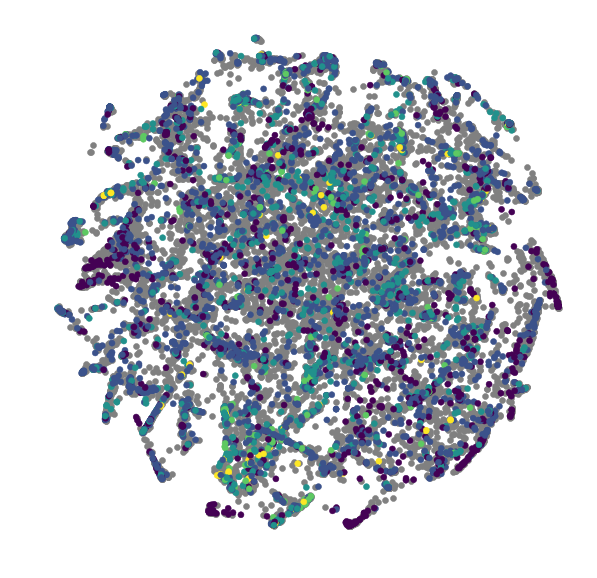

In [24]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.scatter(z_data[5000:,0], z_data[5000:,1], c='gray')
plt.scatter(z_data[:5000,0], z_data[:5000,1], c=train_labels[train_mask])
plt.plot()

# Compress

In [87]:
input_feature = Input(shape=(585,))

In [88]:
encoded = Dense(128, activation='relu')(input_feature)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(585, activation='sigmoid')(decoded)

# Models

In [89]:
# this model maps an input to its reconstruction
autoencoder = Model(input_feature, decoded)

In [90]:
# this model maps an input to its encoded representation
encoder = Model(input_feature, encoded)

In [91]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Train

In [92]:
X_train, X_test = train_test_split(train_df.append(test_df))
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [93]:
from keras.models import load_model
import os

In [94]:
model_path = './autoencoder_2'

In [95]:
if os.path.exists(model_path):
    autoencoder = load_model(model_path)
else:
    autoencoder.fit(X_train, X_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
    autoencoder.save(model_path)

Train on 129652 samples, validate on 43218 samples
Epoch 1/100
129652/129652 [==============================] - 6s - loss: 0.4213 - val_loss: 0.3500
Epoch 2/100
129652/129652 [==============================] - 5s - loss: 0.3305 - val_loss: 0.3101
Epoch 3/100
129652/129652 [==============================] - 5s - loss: 0.3008 - val_loss: 0.2943
Epoch 4/100
129652/129652 [==============================] - 5s - loss: 0.2874 - val_loss: 0.2831
Epoch 5/100
129652/129652 [==============================] - 5s - loss: 0.2786 - val_loss: 0.2783
Epoch 6/100
129652/129652 [==============================] - 5s - loss: 0.2725 - val_loss: 0.2708
Epoch 7/100
129652/129652 [==============================] - 5s - loss: 0.2676 - val_loss: 0.2665
Epoch 8/100
129652/129652 [==============================] - 5s - loss: 0.2640 - val_loss: 0.2642
Epoch 9/100
129652/129652 [==============================] - 5s - loss: 0.2609 - val_loss: 0.2604
Epoch 10/100
129652/129652 [==============================] - 5s - 

129652/129652 [==============================] - 5s - loss: 0.2205 - val_loss: 0.2216
Epoch 84/100
129652/129652 [==============================] - 5s - loss: 0.2204 - val_loss: 0.2216
Epoch 85/100
129652/129652 [==============================] - 5s - loss: 0.2203 - val_loss: 0.2198
Epoch 86/100
129652/129652 [==============================] - 5s - loss: 0.2201 - val_loss: 0.2205
Epoch 87/100
129652/129652 [==============================] - 5s - loss: 0.2200 - val_loss: 0.2208
Epoch 88/100
129652/129652 [==============================] - 5s - loss: 0.2199 - val_loss: 0.2206
Epoch 89/100
129652/129652 [==============================] - 5s - loss: 0.2198 - val_loss: 0.2198
Epoch 90/100
129652/129652 [==============================] - 5s - loss: 0.2197 - val_loss: 0.2205
Epoch 91/100
129652/129652 [==============================] - 5s - loss: 0.2195 - val_loss: 0.2205
Epoch 92/100
129652/129652 [==============================] - 5s - loss: 0.2194 - val_loss: 0.2209
Epoch 93/100
129652/129

In [96]:
encoded_train = encoder.predict(train_df.as_matrix())
encoded_test = encoder.predict(test_df.as_matrix())

In [98]:
encoded_train.mean(axis=0)

array([  8.13373661e+00,   5.02131343e-01,   8.50971508e+00,
         8.00080490e+00,   6.85681915e+00,   7.95363617e+00,
         1.52901089e+00,   8.09975243e+00,   6.52116013e+00,
         5.47547865e+00,   6.42419052e+00,   6.66964483e+00,
         0.00000000e+00,   8.10821819e+00,   1.03280449e+01,
         8.25423849e-05,   3.91859341e+00,   0.00000000e+00,
         6.06719875e+00,   8.41728210e+00,   0.00000000e+00,
         1.02589979e+01,   7.43374681e+00,   1.71463507e-05,
         8.82523155e+00,   6.01781797e+00,   0.00000000e+00,
         7.01946592e+00,   7.35541582e+00,   9.55106449e+00,
         5.71237946e+00,   8.12167418e-05], dtype=float32)

# See data

In [72]:
from sklearn.manifold import TSNE

In [73]:
train_mask = np.random.choice(encoded_train.shape[0], 5000)
test_mask = np.random.choice(encoded_test.shape[0], 15000)

In [ ]:
tsne = TSNE(verbose=True)
z_data = tsne.fit_transform(np.vstack([encoded_train[train_mask], encoded_test[test_mask]]))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000

In [ ]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.scatter(z_data[5000:,0], z_data[5000:,1], c='gray')
plt.scatter(z_data[:5000,0], z_data[:5000,1], c=train_labels[train_mask])
plt.plot()

# Prediction

In [99]:
from xgboost import XGBRegressor, XGBClassifier, DMatrix

In [160]:
X_train, X_test, y_train, y_test = train_test_split(encoded_train, train_labels, test_size=0.5)

In [205]:
xgb_r = XGBRegressor(n_estimators=1000, subsample=0.4, reg_lambda=0.1, silent=False,
                     max_depth=15, learning_rate=0.008, objective='reg:linear')

In [218]:
xgb_r.fit(X_train, y_train, early_stopping_rounds=100,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          eval_metric='rmse')

[0]	validation_0-rmse:1.06788	validation_1-rmse:1.05032
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:1.06209	validation_1-rmse:1.04577
[2]	validation_0-rmse:1.05623	validation_1-rmse:1.0411
[3]	validation_0-rmse:1.05038	validation_1-rmse:1.03647
[4]	validation_0-rmse:1.0449	validation_1-rmse:1.03196
[5]	validation_0-rmse:1.03914	validation_1-rmse:1.02748
[6]	validation_0-rmse:1.03343	validation_1-rmse:1.02304
[7]	validation_0-rmse:1.02806	validation_1-rmse:1.01875
[8]	validation_0-rmse:1.02254	validation_1-rmse:1.01439
[9]	validation_0-rmse:1.01708	validation_1-rmse:1.01011
[10]	validation_0-rmse:1.0117	validation_1-rmse:1.00596
[11]	validation_0-rmse:1.00625	validation_1-rmse:1.00168
[12]	validation_0-rmse:1.00097	validation_1-rmse:0.997593
[13]	validation_0-rmse:0.995593	validation_1-rmse:0.99351
[14]	validation_0-rmse:0.99023	validation_1-rmse:0.98

[137]	validation_0-rmse:0.581002	validation_1-rmse:0.728335
[138]	validation_0-rmse:0.578973	validation_1-rmse:0.72745
[139]	validation_0-rmse:0.576956	validation_1-rmse:0.726604
[140]	validation_0-rmse:0.575135	validation_1-rmse:0.72576
[141]	validation_0-rmse:0.573259	validation_1-rmse:0.724939
[142]	validation_0-rmse:0.571343	validation_1-rmse:0.724085
[143]	validation_0-rmse:0.569371	validation_1-rmse:0.723286
[144]	validation_0-rmse:0.567476	validation_1-rmse:0.722475
[145]	validation_0-rmse:0.565668	validation_1-rmse:0.721702
[146]	validation_0-rmse:0.563738	validation_1-rmse:0.720937
[147]	validation_0-rmse:0.561815	validation_1-rmse:0.72013
[148]	validation_0-rmse:0.560165	validation_1-rmse:0.719396
[149]	validation_0-rmse:0.558281	validation_1-rmse:0.718656
[150]	validation_0-rmse:0.556377	validation_1-rmse:0.717874
[151]	validation_0-rmse:0.554591	validation_1-rmse:0.717108
[152]	validation_0-rmse:0.552861	validation_1-rmse:0.716367
[153]	validation_0-rmse:0.551033	validation

[275]	validation_0-rmse:0.404263	validation_1-rmse:0.672003
[276]	validation_0-rmse:0.403467	validation_1-rmse:0.671887
[277]	validation_0-rmse:0.402642	validation_1-rmse:0.671727
[278]	validation_0-rmse:0.401662	validation_1-rmse:0.671607
[279]	validation_0-rmse:0.400804	validation_1-rmse:0.671473
[280]	validation_0-rmse:0.399902	validation_1-rmse:0.671358
[281]	validation_0-rmse:0.399246	validation_1-rmse:0.671241
[282]	validation_0-rmse:0.398268	validation_1-rmse:0.671082
[283]	validation_0-rmse:0.397455	validation_1-rmse:0.670919
[284]	validation_0-rmse:0.396617	validation_1-rmse:0.670786
[285]	validation_0-rmse:0.395652	validation_1-rmse:0.670619
[286]	validation_0-rmse:0.394808	validation_1-rmse:0.670483
[287]	validation_0-rmse:0.393993	validation_1-rmse:0.67038
[288]	validation_0-rmse:0.393193	validation_1-rmse:0.670256
[289]	validation_0-rmse:0.392423	validation_1-rmse:0.67017
[290]	validation_0-rmse:0.391637	validation_1-rmse:0.670028
[291]	validation_0-rmse:0.390832	validatio

[412]	validation_0-rmse:0.322708	validation_1-rmse:0.662158
[413]	validation_0-rmse:0.322361	validation_1-rmse:0.662144
[414]	validation_0-rmse:0.321835	validation_1-rmse:0.6621
[415]	validation_0-rmse:0.32144	validation_1-rmse:0.662068
[416]	validation_0-rmse:0.320905	validation_1-rmse:0.662039
[417]	validation_0-rmse:0.320491	validation_1-rmse:0.662018
[418]	validation_0-rmse:0.319952	validation_1-rmse:0.661973
[419]	validation_0-rmse:0.319599	validation_1-rmse:0.661954
[420]	validation_0-rmse:0.319144	validation_1-rmse:0.661932
[421]	validation_0-rmse:0.318838	validation_1-rmse:0.661904
[422]	validation_0-rmse:0.318406	validation_1-rmse:0.661851
[423]	validation_0-rmse:0.317985	validation_1-rmse:0.66185
[424]	validation_0-rmse:0.31752	validation_1-rmse:0.661817
[425]	validation_0-rmse:0.317047	validation_1-rmse:0.661777
[426]	validation_0-rmse:0.316698	validation_1-rmse:0.661758
[427]	validation_0-rmse:0.316301	validation_1-rmse:0.661754
[428]	validation_0-rmse:0.315936	validation_1

[550]	validation_0-rmse:0.275103	validation_1-rmse:0.659322
[551]	validation_0-rmse:0.274804	validation_1-rmse:0.659302
[552]	validation_0-rmse:0.274543	validation_1-rmse:0.659291
[553]	validation_0-rmse:0.274368	validation_1-rmse:0.659282
[554]	validation_0-rmse:0.274036	validation_1-rmse:0.659263
[555]	validation_0-rmse:0.273736	validation_1-rmse:0.659259
[556]	validation_0-rmse:0.273588	validation_1-rmse:0.659261
[557]	validation_0-rmse:0.273241	validation_1-rmse:0.659238
[558]	validation_0-rmse:0.273068	validation_1-rmse:0.659229
[559]	validation_0-rmse:0.272872	validation_1-rmse:0.659219
[560]	validation_0-rmse:0.272515	validation_1-rmse:0.659199
[561]	validation_0-rmse:0.271983	validation_1-rmse:0.659191
[562]	validation_0-rmse:0.271589	validation_1-rmse:0.659179
[563]	validation_0-rmse:0.271316	validation_1-rmse:0.659173
[564]	validation_0-rmse:0.27103	validation_1-rmse:0.659172
[565]	validation_0-rmse:0.270665	validation_1-rmse:0.659169
[566]	validation_0-rmse:0.270442	validati

[687]	validation_0-rmse:0.239161	validation_1-rmse:0.658238
[688]	validation_0-rmse:0.238813	validation_1-rmse:0.658243
[689]	validation_0-rmse:0.238458	validation_1-rmse:0.658255
[690]	validation_0-rmse:0.238152	validation_1-rmse:0.658247
[691]	validation_0-rmse:0.237981	validation_1-rmse:0.658246
[692]	validation_0-rmse:0.237755	validation_1-rmse:0.658241
[693]	validation_0-rmse:0.2375	validation_1-rmse:0.658215
[694]	validation_0-rmse:0.237319	validation_1-rmse:0.65822
[695]	validation_0-rmse:0.237147	validation_1-rmse:0.658212
[696]	validation_0-rmse:0.236852	validation_1-rmse:0.658194
[697]	validation_0-rmse:0.236598	validation_1-rmse:0.658187
[698]	validation_0-rmse:0.236373	validation_1-rmse:0.658195
[699]	validation_0-rmse:0.236066	validation_1-rmse:0.658181
[700]	validation_0-rmse:0.235802	validation_1-rmse:0.658184
[701]	validation_0-rmse:0.23561	validation_1-rmse:0.658191
[702]	validation_0-rmse:0.235321	validation_1-rmse:0.658186
[703]	validation_0-rmse:0.2351	validation_1-

[824]	validation_0-rmse:0.207819	validation_1-rmse:0.657512
[825]	validation_0-rmse:0.207662	validation_1-rmse:0.657522
[826]	validation_0-rmse:0.207477	validation_1-rmse:0.657538
[827]	validation_0-rmse:0.207279	validation_1-rmse:0.657533
[828]	validation_0-rmse:0.207035	validation_1-rmse:0.657527
[829]	validation_0-rmse:0.206864	validation_1-rmse:0.657505
[830]	validation_0-rmse:0.206615	validation_1-rmse:0.657507
[831]	validation_0-rmse:0.20632	validation_1-rmse:0.657501
[832]	validation_0-rmse:0.206253	validation_1-rmse:0.6575
[833]	validation_0-rmse:0.205986	validation_1-rmse:0.657484
[834]	validation_0-rmse:0.205742	validation_1-rmse:0.657482
[835]	validation_0-rmse:0.205595	validation_1-rmse:0.657477
[836]	validation_0-rmse:0.20538	validation_1-rmse:0.657479
[837]	validation_0-rmse:0.205162	validation_1-rmse:0.65747
[838]	validation_0-rmse:0.205124	validation_1-rmse:0.657474
[839]	validation_0-rmse:0.204923	validation_1-rmse:0.657484
[840]	validation_0-rmse:0.204754	validation_1

[962]	validation_0-rmse:0.181235	validation_1-rmse:0.657075
[963]	validation_0-rmse:0.180948	validation_1-rmse:0.657086
[964]	validation_0-rmse:0.180825	validation_1-rmse:0.657085
[965]	validation_0-rmse:0.180682	validation_1-rmse:0.657091
[966]	validation_0-rmse:0.180452	validation_1-rmse:0.657087
[967]	validation_0-rmse:0.180295	validation_1-rmse:0.657086
[968]	validation_0-rmse:0.180136	validation_1-rmse:0.657088
[969]	validation_0-rmse:0.180015	validation_1-rmse:0.657084
[970]	validation_0-rmse:0.179701	validation_1-rmse:0.657089
[971]	validation_0-rmse:0.179485	validation_1-rmse:0.657087
[972]	validation_0-rmse:0.179272	validation_1-rmse:0.657078
[973]	validation_0-rmse:0.179145	validation_1-rmse:0.657081
[974]	validation_0-rmse:0.178792	validation_1-rmse:0.657084
[975]	validation_0-rmse:0.178617	validation_1-rmse:0.657086
[976]	validation_0-rmse:0.178439	validation_1-rmse:0.657099
[977]	validation_0-rmse:0.178251	validation_1-rmse:0.657096
[978]	validation_0-rmse:0.178114	validat

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.008, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=0.1,
       scale_pos_weight=1, seed=0, silent=False, subsample=0.4)

In [211]:
xgb_r.fit(train_df.as_matrix(), 
          train_labels, eval_set=[(train_df.as_matrix(), train_labels)],
          eval_metric='rmse')

[0]	validation_0-rmse:1.05836
[1]	validation_0-rmse:1.05224
[2]	validation_0-rmse:1.04621
[3]	validation_0-rmse:1.04015
[4]	validation_0-rmse:1.03419
[5]	validation_0-rmse:1.02825
[6]	validation_0-rmse:1.02229
[7]	validation_0-rmse:1.01647
[8]	validation_0-rmse:1.01069
[9]	validation_0-rmse:1.00504
[10]	validation_0-rmse:0.999382
[11]	validation_0-rmse:0.993841
[12]	validation_0-rmse:0.988295
[13]	validation_0-rmse:0.982851
[14]	validation_0-rmse:0.97729
[15]	validation_0-rmse:0.971762
[16]	validation_0-rmse:0.966354
[17]	validation_0-rmse:0.960922
[18]	validation_0-rmse:0.955563
[19]	validation_0-rmse:0.950435
[20]	validation_0-rmse:0.945222
[21]	validation_0-rmse:0.939992
[22]	validation_0-rmse:0.934838
[23]	validation_0-rmse:0.929672
[24]	validation_0-rmse:0.924599
[25]	validation_0-rmse:0.919536
[26]	validation_0-rmse:0.914578
[27]	validation_0-rmse:0.909585
[28]	validation_0-rmse:0.904672
[29]	validation_0-rmse:0.899856
[30]	validation_0-rmse:0.895153
[31]	validation_0-rmse:0.8902

[253]	validation_0-rmse:0.410321
[254]	validation_0-rmse:0.409528
[255]	validation_0-rmse:0.408656
[256]	validation_0-rmse:0.407868
[257]	validation_0-rmse:0.407049
[258]	validation_0-rmse:0.406246
[259]	validation_0-rmse:0.405435
[260]	validation_0-rmse:0.404666
[261]	validation_0-rmse:0.403772
[262]	validation_0-rmse:0.402854
[263]	validation_0-rmse:0.402072
[264]	validation_0-rmse:0.401306
[265]	validation_0-rmse:0.400479
[266]	validation_0-rmse:0.399747
[267]	validation_0-rmse:0.398948
[268]	validation_0-rmse:0.398019
[269]	validation_0-rmse:0.39738
[270]	validation_0-rmse:0.396573
[271]	validation_0-rmse:0.395932
[272]	validation_0-rmse:0.395076
[273]	validation_0-rmse:0.394249
[274]	validation_0-rmse:0.393573
[275]	validation_0-rmse:0.392747
[276]	validation_0-rmse:0.391937
[277]	validation_0-rmse:0.391336
[278]	validation_0-rmse:0.390556
[279]	validation_0-rmse:0.389842
[280]	validation_0-rmse:0.389086
[281]	validation_0-rmse:0.38841
[282]	validation_0-rmse:0.387594
[283]	valida

[503]	validation_0-rmse:0.28624
[504]	validation_0-rmse:0.286073
[505]	validation_0-rmse:0.285969
[506]	validation_0-rmse:0.285643
[507]	validation_0-rmse:0.285374
[508]	validation_0-rmse:0.28515
[509]	validation_0-rmse:0.284913
[510]	validation_0-rmse:0.284604
[511]	validation_0-rmse:0.284312
[512]	validation_0-rmse:0.2841
[513]	validation_0-rmse:0.283844
[514]	validation_0-rmse:0.28356
[515]	validation_0-rmse:0.283163
[516]	validation_0-rmse:0.282873
[517]	validation_0-rmse:0.282624
[518]	validation_0-rmse:0.282387
[519]	validation_0-rmse:0.282174
[520]	validation_0-rmse:0.281872
[521]	validation_0-rmse:0.281571
[522]	validation_0-rmse:0.281218
[523]	validation_0-rmse:0.280971
[524]	validation_0-rmse:0.280705
[525]	validation_0-rmse:0.280526
[526]	validation_0-rmse:0.280353
[527]	validation_0-rmse:0.279985
[528]	validation_0-rmse:0.279685
[529]	validation_0-rmse:0.279445
[530]	validation_0-rmse:0.279122
[531]	validation_0-rmse:0.278796
[532]	validation_0-rmse:0.278377
[533]	validatio

[753]	validation_0-rmse:0.226051
[754]	validation_0-rmse:0.225831
[755]	validation_0-rmse:0.225691
[756]	validation_0-rmse:0.225427
[757]	validation_0-rmse:0.225194
[758]	validation_0-rmse:0.22498
[759]	validation_0-rmse:0.224881
[760]	validation_0-rmse:0.224575
[761]	validation_0-rmse:0.224373
[762]	validation_0-rmse:0.224121
[763]	validation_0-rmse:0.223865
[764]	validation_0-rmse:0.223658
[765]	validation_0-rmse:0.223423
[766]	validation_0-rmse:0.22321
[767]	validation_0-rmse:0.22305
[768]	validation_0-rmse:0.222873
[769]	validation_0-rmse:0.222613
[770]	validation_0-rmse:0.222273
[771]	validation_0-rmse:0.222118
[772]	validation_0-rmse:0.22189
[773]	validation_0-rmse:0.221653
[774]	validation_0-rmse:0.221528
[775]	validation_0-rmse:0.221303
[776]	validation_0-rmse:0.221059
[777]	validation_0-rmse:0.220926
[778]	validation_0-rmse:0.220788
[779]	validation_0-rmse:0.220542
[780]	validation_0-rmse:0.220366
[781]	validation_0-rmse:0.220122
[782]	validation_0-rmse:0.219996
[783]	validati

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.008, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=0.1,
       scale_pos_weight=1, seed=0, silent=False, subsample=0.4)

In [216]:
xgb = XGBClassifier(n_estimators=100, subsample=0.4, reg_lambda=0.1, silent=False,
                     max_depth=15, learning_rate=0.008, objective='reg:logistic')

In [217]:
train_data = train_df.as_matrix()#.copy()
train_y = train_labels.copy()
possible_data = test_df.as_matrix()#.copy()
while possible_data.shape[0] != 0:
    print train_data.shape, train_y.shape, possible_data.shape
    xgb.fit(train_data, train_y)
    pred = xgb.predict_proba(possible_data)
    max_pred = np.max(pred, axis=1)
    selected = np.argsort(max_pred)[::-1]
    selected = selected[max_pred[selected]>0.90]
    if selected.shape[0] < 10:
        print 'Leaving...'
        break
    print 'Add:', selected.shape, 'MP:', max_pred[selected].mean()
    train_data = np.vstack([train_data, possible_data[selected]])
    train_y = np.hstack([train_y, np.argmax(pred[selected], axis=1)])
    possible_data = np.delete(possible_data, selected, axis=0)

(34815, 585) (34815,) (138055, 585)
Leaving...


In [33]:
X_train.max(axis=0)

array([ 0.96499348,  1.70590734,  0.62535661,  1.23202002,  1.56379533,
        1.49400973,  1.8716588 ,  1.73499417,  1.79175866,  2.47391915,
        1.50896406,  2.1147356 ,  1.04061973,  1.81081057,  2.54124904,
        2.22516561,  1.56582236,  2.15807772,  0.99605834,  1.3361541 ,
        1.21414495,  1.26842594,  1.38362288,  1.49751019,  1.83771527,
        1.92677963,  2.40214443,  3.00696182,  1.36453426,  0.78990912,
        1.61010146,  1.38579988], dtype=float32)

In [ ]:
xgb_r = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb_r.fit(encoded_train, train_y)

In [213]:
prediction = xgb_r.predict(test_df.as_matrix())

In [214]:
prediction

array([ 0.0932909 ,  0.05149096,  0.02142641, ...,  0.82037258,
        1.16142631,  1.58255148], dtype=float32)

In [215]:
with open('./submission_xgb_stack_semisupervised.txt', 'w') as f:
    f.write('Id,Target\n')
    for i, v in enumerate(prediction):
        f.write('{},{}\n'.format(i+1, min(4, max(0, v))))